In [2]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns # new library
import matplotlib.pyplot as plt
import numpy as np


## INCIDENCE MERGED FILES FOR ALL LONDON NPM25

In [3]:
directory = '../data_clean/health_xls'
sheet_name = 'Incidence'

data_frames = []

for filename in os.listdir(directory):
    if filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
 
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)


def combine_ci(series):
    return np.sqrt((series ** 2).sum())


london_PM25_incidence = merged_df.groupby(['Scenario', 'Year', 'Disease', 'AgeGroup'], as_index=False).agg({
    'Incidence': 'sum',
    '95% CL': combine_ci  # Combine 95% CL values
})


print(london_PM25_incidence.head())


output_file = os.path.join(directory, 'london_pm25_incidence.xlsx')
london_PM25_incidence.to_excel(output_file, index=False)

print(f"Data successfully merged and saved to {output_file}")

   Scenario  Year       Disease AgeGroup  Incidence   95% CL
0         0  2016  adult asthma      0-5          0  0.00000
1         0  2016  adult asthma    06-17          0  0.00000
2         0  2016  adult asthma    18-64       5811  6.63325
3         0  2016  adult asthma      65+       1010  1.00000
4         0  2016  adult asthma    total       6821  6.63325
Data successfully merged and saved to ../data_clean/health_xls/london_pm25_incidence.xlsx


## SCENARIO 0 NO2 INCIDENCE FOR ALL LONDON

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/1058101640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/1058101640.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


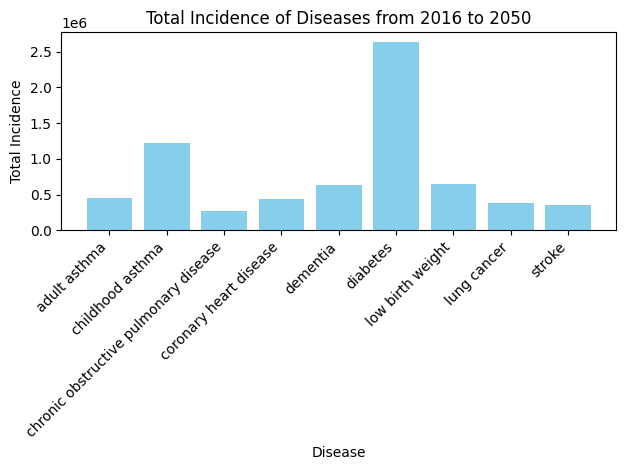

In [4]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]


PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
# NO2_incidence_s0.info()

# NO2_incidence_s0.head()

# NO2_incidence_s0.isnull().sum()

# diseases = NO2_incidence_s0['Disease'].unique()
# diseases


grouped_data = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

grouped_data
total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [5]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
grouped_data
total_incidence = grouped_data.sum(axis=1)
total_incidence


Disease
total    3500752
dtype: int64

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/812608165.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_incidence_s0[PM25_incidence_s0['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

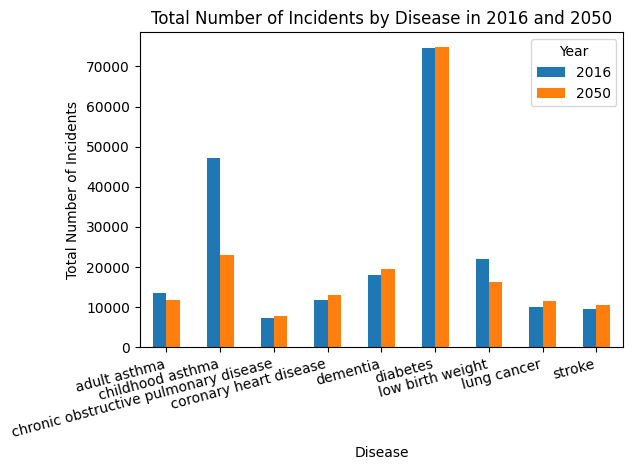

In [6]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = PM25_incidence_s0[PM25_incidence_s0['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## SCENARIO 2 NO2 'INCIDENCE' FOR ALL LONDON

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/1539194099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/1539194099.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


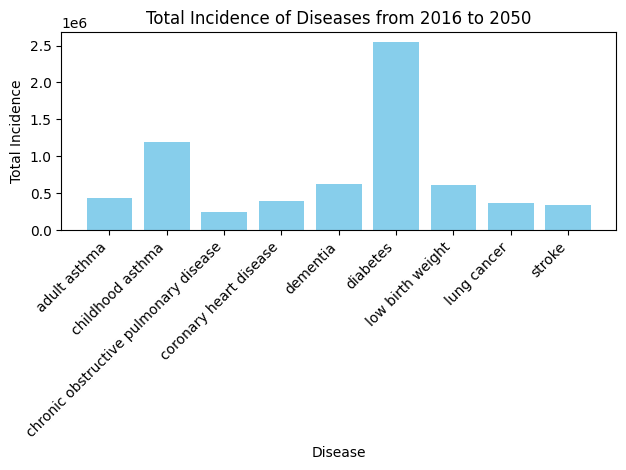

In [7]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]


PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
# NO2_incidence_s0.info()

# NO2_incidence_s0.head()

# NO2_incidence_s0.isnull().sum()

# diseases = NO2_incidence_s0['Disease'].unique()
# diseases


grouped_data = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

grouped_data
total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/4030746209.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_incidence_s2[PM25_incidence_s2['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

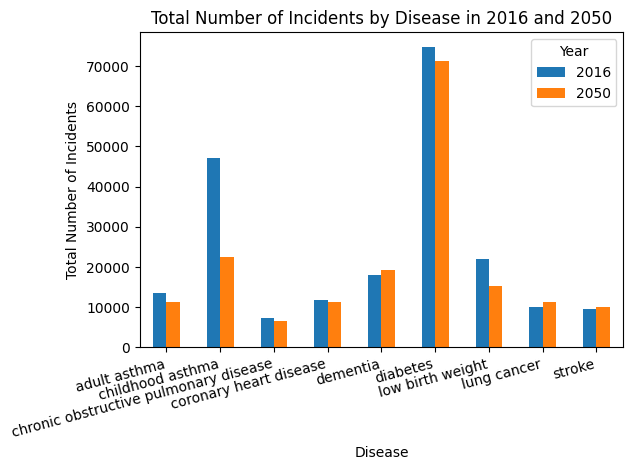

In [8]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE SCENARIO 2

df_selected_years = PM25_incidence_s2[PM25_incidence_s2['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [9]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
grouped_data
total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    3382184
dtype: int64

## INCIDENCE AVOIDED MERGED FILES FOR ALL LONDON NO2

In [11]:
directory = '../data_clean/health_xls'

sheet_name = 'Incidence Cases Avoided'

data_frames = []

for filename in os.listdir(directory):
    if filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
 
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)


def combine_ci(series):
    return np.sqrt((series ** 2).sum())


london_PM25_avoided = merged_df.groupby(['Scenario', 'Year', 'Disease', 'AgeGroup'], as_index=False).agg({
    'Incidence Cases Avoided': 'sum',
    '95% CL': combine_ci  # Combine 95% CL values
})


print(london_PM25_avoided.head())


output_file = os.path.join(directory, 'london_NO2_avoided.xlsx')
london_PM25_avoided.to_excel(output_file, index=False)

print(f"Data successfully merged and saved to {output_file}")

   Scenario  Year       Disease AgeGroup  Incidence Cases Avoided   95% CL
0         1  2016  adult asthma      0-5                        0  0.00000
1         1  2016  adult asthma    06-17                        0  0.00000
2         1  2016  adult asthma    18-64                       -1  6.63325
3         1  2016  adult asthma      65+                        1  1.00000
4         1  2016  adult asthma    total                        0  6.63325
Data successfully merged and saved to ../data_clean/health_xls/london_NO2_avoided.xlsx


## SCENARIO 2 PM25 'INCIDENCE AVOIDED' FOR ALL LONDON

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/243954892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_avoided_s2['Year'] = pd.to_datetime(london_PM25_avoided['Year'], format='%Y')
/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/243954892.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


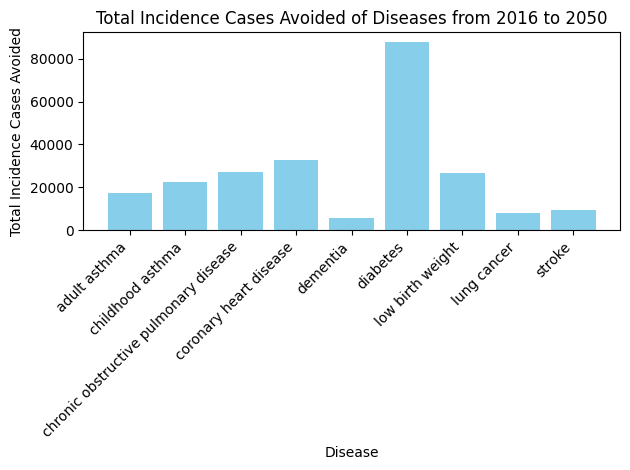

In [12]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

# london_NO2_avoided

# Total number for each disease by age from 2016-2050 INCIDENCE
PM25_avoided_s2 = london_PM25_avoided[london_PM25_avoided['Scenario'] == 2]
PM25_avoided_s2['Year'] = pd.to_datetime(london_PM25_avoided['Year'], format='%Y')
PM25_avoided_s2
# NO2_avoided_s0.info()
# NO2_avoided_s0.head()
# NO2_avoided_s0.isnull().sum()
# diseases = NO2_avoided_s0['Disease'].unique()
# diseases
# NO2_avoided_s0.isna().sum()
# NO2_avoided_s0.keys()

# NO2_avoided_s0
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

grouped_avoided
total_incidence_per_disease = grouped_avoided.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()





In [13]:
# TOTAL ALL DISEASES
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    118568
dtype: int64

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/637791460.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_avoided_s2[PM25_avoided_s2['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

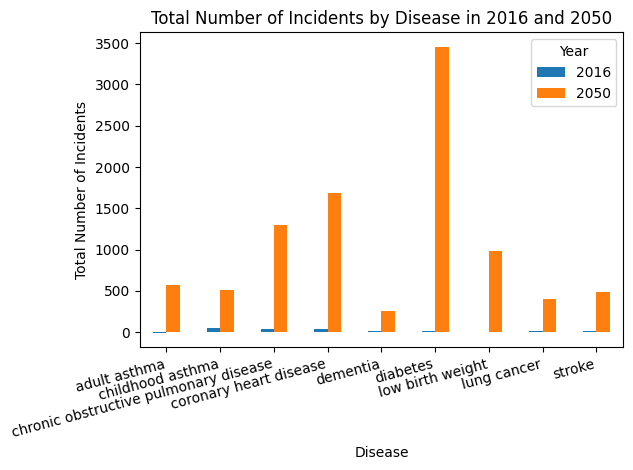

In [14]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE AVOIDED

df_selected_years = PM25_avoided_s2[PM25_avoided_s2['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## PERCENTAGE PER DISEASE DECREASE/INCREASE. COMPARE SCENARIO 0 AND 2 FOR PM25

In [15]:
# i need totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
adult asthma                              434220
childhood asthma                         1193212
chronic obstructive pulmonary disease     241338
coronary heart disease                    400556
dementia                                  621822
diabetes                                 2551056
low birth weight                          614794
lung cancer                               367734
stroke                                    339636
dtype: int64 Disease
adult asthma                              451384
childhood asthma                         1215620
chronic obstructive pulmonary disease     268522
coronary heart disease                    433282
dementia                                  627318
diabetes                                 2638920
low birth weight                          641474
lung cancer                               375874
stroke                                    349110
dtype: int64


/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/1136577884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/1136577884.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


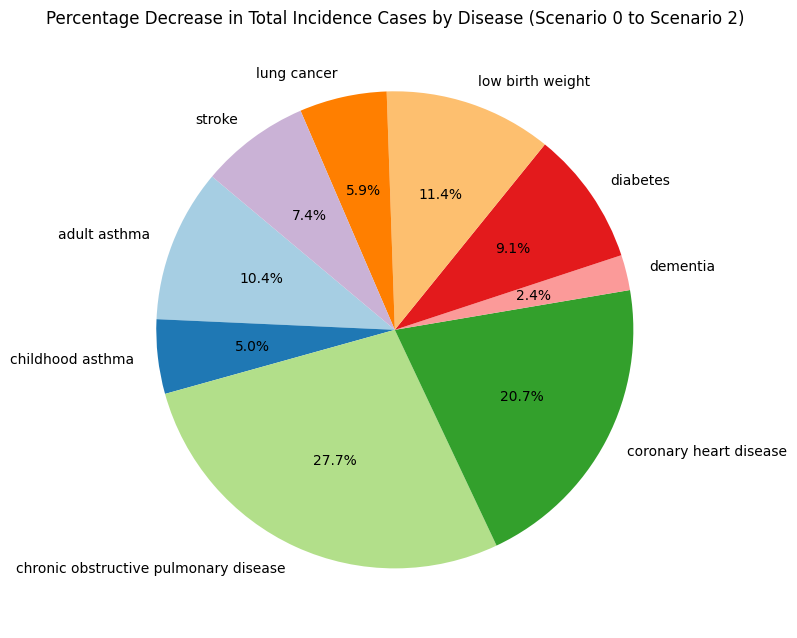

In [16]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

# # Plotting the pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(positive_change, labels=positive_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# plt.title('Percentage Increase in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()


In [17]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)


Absolute Change in Total Incidence Cases for Each Disease:
Disease
adult asthma                            -17164
childhood asthma                        -22408
chronic obstructive pulmonary disease   -27184
coronary heart disease                  -32726
dementia                                 -5496
diabetes                                -87864
low birth weight                        -26680
lung cancer                              -8140
stroke                                   -9474
dtype: int64


## TOTALS 'coronary heart disease', 'childhood asthma', 'lung cancer'  PM25, DIFFERENCE BETWEEN 0 AND 2 SCENARIO

In [18]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['coronary heart disease', 'childhood asthma', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease * -1)


Total Number of Decrease for Selected Diseases:
63274


## PERCENTAGE ALL DIESEASE DECREASE. COMPARE SCENARIO 0 AND 2 FOR PM25

In [19]:
# i need totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)




Disease
total    3382184
dtype: int64 Disease
total    3500752
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.386929
dtype: float64


/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/416060684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/416060684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


## PERCENTAGE ALL DIESEASE DECREASE. COMPARE SCENARIO 0 AND 2 FOR NO2

Disease
total    3382184
dtype: int64 Disease
total    3500752
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.386929
dtype: float64


/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/2355157791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_16101/2355157791.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


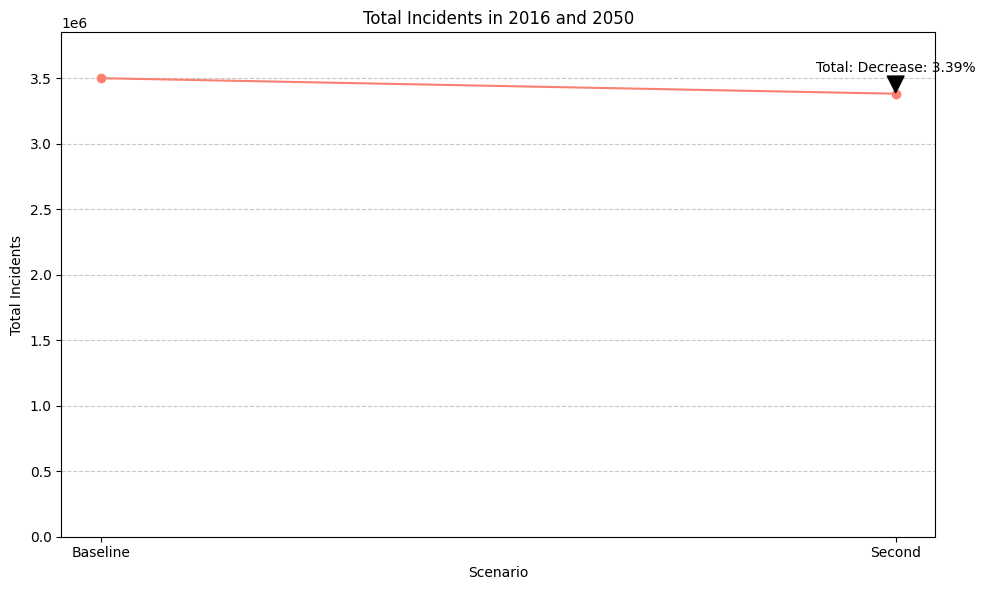

In [20]:
# i need totals for all disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals for all disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()